<a href="https://colab.research.google.com/github/nisha1365/Playground-Series-S3E12-Kaggle-competition/blob/main/Playground_Series_Season_3%2C_Episode_12_GridSearch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [274]:
df = pd.read_csv("/content/train.csv",index_col="id").reset_index(drop=True)

In [275]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


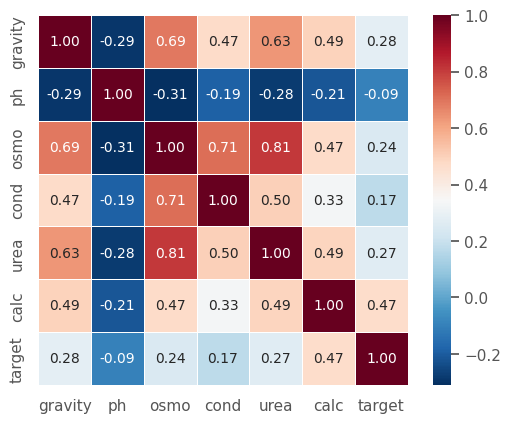

In [276]:
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f') 
plt.show()

In [277]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


In [279]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [280]:
X = df.drop('target', axis = 1)

y = df['target']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [282]:
rfc = RandomForestClassifier()

In [283]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [284]:
print(clf.best_params_)


{'max_depth': 10, 'max_features': 1}


In [285]:


print(clf.best_score_)

0.7405172413793103


In [286]:
train_pred = clf.predict_proba(X_train)[:,1]


In [287]:
roc_auc_score(y_train, train_pred)

1.0

In [288]:

val_pred = clf.predict_proba(X_test)[:,1]

In [289]:
score = roc_auc_score(y_test, val_pred)
score

0.7964487905301081

In [293]:
df2 = pd.read_csv('/content/test.csv',index_col = "id")

In [294]:
df2

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
414,1.017,5.24,345,11.5,152,1.16
415,1.020,5.68,874,29.0,385,3.46
416,1.024,5.36,698,19.5,354,13.00
417,1.020,5.33,668,25.3,252,3.46
418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...
685,1.029,6.27,853,21.4,364,7.31
686,1.012,5.62,410,14.0,195,1.45
687,1.031,5.68,874,29.0,380,4.49


In [295]:
submission = pd.DataFrame({'id':df2.index
                          ,'target':clf.predict_proba(df2)[:,1]})
submission
     

,id,target
0,414,0.190000
1,415,0.638854
2,416,0.752402
3,417,0.502042
4,418,0.385681
...,...,...
271,685,0.857255
272,686,0.090829
273,687,0.642193
274,688,0.108909


In [297]:
submission.to_csv('submission_GRid.csv', index=False)